In [5]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import logomaker

# Insert path to mavenn beginning of path
import os
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local')


# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('gb1')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 106,336
training + validation N: 424,401


,set,input_ct,selected_ct,y,x
0,training,73.0,62.0,-1.021847,QYKLILNGKTLKGETTTEAHDAATAEKVFKQYANDNGVDGEWTYDD...
1,training,122.0,0.0,-7.732188,QYKLILNGKTLKGETTTEAVDAATAEKVFPQYANDNGVDGEWTYDD...
2,training,794.0,598.0,-1.198072,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANKNGVDGEWTLDD...
3,training,1115.0,595.0,-1.694626,QYKLILNIKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDS...
4,validation,97.0,2.0,-5.819421,QYKLINNGKTLKGETTTEAVDAATAEKVFKIYANDNGVDGEWTYDD...
5,training,40.0,169.0,1.262166,QYKLILNGKTLWGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
6,training,244.0,819.0,0.953169,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYVV...
7,training,381.0,232.0,-1.502916,QYKLILNGKTLKGAFTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
8,training,366.0,5.0,-6.724347,QYKLILNGKTLKGETTTEAVDAVTHEKVFKQYANDNGVDGEWTYDD...
9,training,119.0,145.0,-0.506739,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANENGVDGEWTYDD...


In [3]:
# Get x and y
x_test = test_df['x'].values
y_test = test_df['y'].values

In [6]:
# Get sequence length
L = len(data_df['x'][0])


for number_latent_nodes in range(1,11,1):

    # Define model
    model = mavenn.Model(L=L,
                         alphabet='protein',
                         gpmap_type='additive',
                         number_latent_nodes=number_latent_nodes,
                         regression_type='Multi_Phi_GE',
                         ge_noise_model_type='SkewedT',
                         ge_heteroskedasticity_order=2)
    
    # Set training data
    model.set_data(x=data_df['x'],
               y=data_df['y'],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True,verbose=False)
    
    # Fit model to data
    model.fit(learning_rate=.0005,
              epochs=1000,
              batch_size=1000,
              early_stopping=True,
              early_stopping_patience=25,
              linear_initialization=False,
              verbose=False)

    # Save model
    model.save(f'multi_phi_gb1_models/gb1_ge_additive_{number_latent_nodes}_latent_nodes')
    
    print(f'nodes = {number_latent_nodes}, I_var = {model.I_variational(x_test, y_test)}, Rsq test = {np.corrcoef(model.x_to_yhat(x_test),y_test)[0][1]**2}')

    


In [7]:
I_var_list = [2.1825397330340657,
              2.3346994025726704,
              2.435863520143799,
              2.4870547248693198,
              2.404871124062823,
              2.5241599382774513,
              2.536106273409838,
              2.5122068959235633,
              2.5639356105526905,
              2.545502859064035]

Rsq_list = [0.937,
            0.948,
            0.955,
            0.9583721064212293,
            0.9541062638567935,
            0.9623791508128103,
            0.962944717868401,
            0.9593107816865742,
            0.9638250163447503,
            0.9628376086405896]

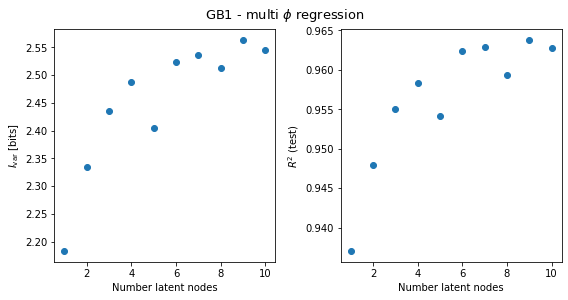

In [8]:
fig, ax = plt.subplots(1,2 ,figsize = (8,4))

ax[0].scatter(np.arange(1,11), I_var_list)
ax[0].set_xlabel('Number latent nodes')
ax[0].set_ylabel('${I_{\\rm var}}$ [bits]')

ax[1].scatter(np.arange(1,11), Rsq_list)
ax[1].set_xlabel('Number latent nodes')
ax[1].set_ylabel('$R^2$ (test)')

fig.suptitle('GB1 - multi $\phi$ regression',y=1.03,fontsize=13)
fig.tight_layout()
fig.savefig('GB1_multiphi_I_var_Rsq_vs_latent_nodes.png',bbox_inches='tight',dpi=200)


NameError: name 'Rsq' is not defined

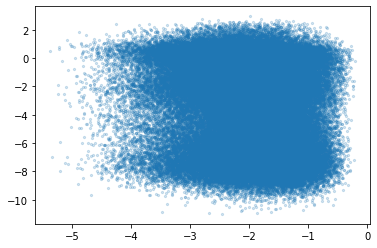

In [9]:

plt.scatter(model.x_to_yhat(x_test),y_test,s=5,alpha=0.2,c='C0')
plt.title(f'$R^2 =${Rsq[0:5]}')
plt.xlabel('$\hat{y}$')
plt.ylabel('y test')

In [ ]:
# phi 1: I_var = (2.1825397330340657, 0.008721767754527314), Rsq = 0.937
# phi 2: I_var = (2.3346994025726704, 0.009505302977615558), Rsq = 0.948
# phi 3: I_var = (2.435863520143799, 0.009511816841250425),  Rsq = 0.955